# <span style= "color :red"> 오토인코더 </span>
- 정의 : 입력 데이터의 특징을 효울적으로 담아낸 이미지를 만들어 내는 알고리즘<br><br>


### <span style= "color :blue"> - 오토인코더 모델 생성  </span>


In [6]:
from enum import auto
from tensorflow import keras 
autoencoder = keras.Sequential()

# 인코딩 부분 ---> 차원을 축소시키는 부분
autoencoder.add(keras.layers.Conv2D(16, kernel_size=3, padding="same", input_shape=(28,28,1), activation="relu"))
autoencoder.add(keras.layers.MaxPool2D(2, padding="same"))

autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(keras.layers.MaxPool2D(2, padding="same"))

autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, strides =2 ,padding="same", activation="relu"))


# 디코딩 부분 ---> 차원을 점차 늘려 입력값과 똑같은 크기의 출력을 내보내는 부분
autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(keras.layers.UpSampling2D())

autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(keras.layers.UpSampling2D())

autoencoder.add(keras.layers.Conv2D(16, kernel_size=3, activation="relu"))
autoencoder.add(keras.layers.UpSampling2D())

autoencoder.add(keras.layers.Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))

# 전체 구조 확인 
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 8)          

### <span style= "color :blue"> - 오토인코더 모델 실행  </span>


Epoch 1/50
469/469 [==============================] - 21s 43ms/step - loss: 0.2061 - val_loss: 0.1375
Epoch 2/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1273 - val_loss: 0.1181
Epoch 3/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1152 - val_loss: 0.1108
Epoch 4/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1096 - val_loss: 0.1066
Epoch 5/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1060 - val_loss: 0.1033
Epoch 6/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1031 - val_loss: 0.1007
Epoch 7/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1005 - val_loss: 0.0980
Epoch 8/50
469/469 [==============================] - 20s 42ms/step - loss: 0.0982 - val_loss: 0.0960
Epoch 9/50
469/469 [==============================] - 20s 42ms/step - loss: 0.0964 - val_loss: 0.0946
Epoch 10/50
469/469 [==============================] - 20s 42ms/step - loss: 0.094

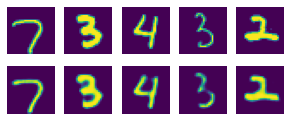

In [10]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

(x_train,_), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255

autoencoder = keras.Sequential()

# 인코딩 부분 ---> 차원을 축소시키는 부분
autoencoder.add(keras.layers.Conv2D(16, kernel_size=3, padding="same", input_shape=(28,28,1), activation="relu"))
autoencoder.add(keras.layers.MaxPool2D(2, padding="same"))

autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(keras.layers.MaxPool2D(2, padding="same"))

autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, strides =2 ,padding="same", activation="relu"))


# 디코딩 부분 ---> 차원을 점차 늘려 입력값과 똑같은 크기의 출력을 내보내는 부분
autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(keras.layers.UpSampling2D())

autoencoder.add(keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(keras.layers.UpSampling2D())

autoencoder.add(keras.layers.Conv2D(16, kernel_size=3, activation="relu"))
autoencoder.add(keras.layers.UpSampling2D())

autoencoder.add(keras.layers.Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))


# 컴파일 및 모델을 학습하는 부분 
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(x_train, x_train, epochs=50, batch_size = 128, validation_data=(x_test, x_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(x_test.shape[0], size=5)       # 앞서 만든 오토인코더 모델에 넣음

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(x_test)   # 앞서 만든 오토인코더 모델에 넣음

plt.figure(figsize=(7,2))

for i, img_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2,7,i+1)
    # 테스트할 이미지를 그래도 보여줌
    plt.imshow(x_test[img_idx].reshape(28,28))
    ax.axis("off")
    ax = plt.subplot(2,7,7+i+1)
    # 오토인코더이 결과를 다음 열에 입력
    plt.imshow(ae_imgs[img_idx].reshape(28,28))
    ax.axis("off")
plt.show()

313/313 [==============================] - 1s 4ms/step


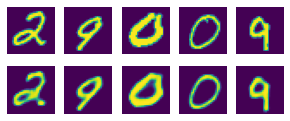

In [13]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(x_test.shape[0], size=5)       # 앞서 만든 오토인코더 모델에 넣음

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(x_test)   # 앞서 만든 오토인코더 모델에 넣음

plt.figure(figsize=(7,2))

for i, img_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2,7,i+1)
    # 테스트할 이미지를 그래도 보여줌
    plt.imshow(x_test[img_idx].reshape(28,28))
    ax.axis("off")
    ax = plt.subplot(2,7,7+i+1)
    # 오토인코더이 결과를 다음 열에 입력
    plt.imshow(ae_imgs[img_idx].reshape(28,28))
    ax.axis("off")
plt.show()